# Word2Vec
Word to Vector.
Developed by Google around 2013 and it works based on neural network technique - with ability establish relationship between words, and able to generate next data or surrounding data based on existing words.

2 techniques discussed under Word2Vec - 
- CBOW ~ Continuous Bag of Words. "I am teaching ....." (generate next words)
    Always tries to generate the Target word based on the Context
- Skip-Gram ~ ".....teaching....." (generate surrounding words)
    Always tries to generate surrounding prediction

CBOW vs Skip-Gram
- CBOW      ~ Faster, Worst
- Skip-Gram ~ Slower, Better

In [1]:
import nltk
import gensim
import string
import matplotlib.pyplot as plt
import numpy as np
import re

from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [2]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sameermeher/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sameermeher/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
corpus_old = [
    "my name is Sameer Meher .",
    "i use to teach all the data stack along with ops and cloud !",
    "fsl dfdtegd  dfderedfdf  fdfd fd fer34 3 fdf dfdfdfdff #$#$#S 4343 ,",
    "nlp is very veyr amazing",
    "we are trying to learn word2vec,",
    "we will try to build two models for word 2 vec cbow and skipgram",
    "we will also work on cleanning the data whihc is basically a part of data preprocessing, ",
    "natual language processing is a part of AI ,",
    "my phone number is 3434 3344 5443434",
    "word 2 vec is being used for word embeddings ",
    "it is going to perform better than one hot , bow or TF-IDF"
]
corpus =  [
    "AI-assisted legal research helps lawyers analyze case laws more efficiently.",
    "AI is used in astronomy to analyze vast amounts of cosmic data.",
    "Smart homes use AI for automation and energy efficiency.",
    "AI is revolutionizing the way people search for information online.",
    "AI-based handwriting recognition improves digitization and document processing.",
    "The use of AI in wildlife conservation helps monitor endangered species.",
    "AI is shaping the future of content creation in journalism and storytelling.",
    "AI-driven job matching platforms help connect candidates with suitable employers.",
    "The financial sector uses AI to assess credit risk and detect fraudulent transactions.",
    "AI in manufacturing enhances efficiency and reduces production errors.",
    "Wearable technology powered by AI helps monitor personal health metrics.",
    "The role of AI in sports analytics improves team performance analysis.",
    "AI is helping researchers discover new materials and chemical compounds.",
    "AI in law enforcement aids in criminal investigations and predictive policing.",
    "AI-driven autonomous ships are transforming maritime transportation.",
    "AI-powered smart grids enhance energy distribution and consumption efficiency."  
]

In [4]:
s = "my name is Sameer meher 454 454  .#$"
s.lower()

'my name is sameer meher 454 454  .#$'

In [5]:
re.sub(r'\d+',"",s)

'my name is Sameer meher    .#$'

In [6]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [7]:
# Remove all punctuation from the string
s.translate(str.maketrans("","",string.punctuation))

'my name is Sameer meher 454 454  '

In [8]:
word_tokenize(s)

['my', 'name', 'is', 'Sameer', 'meher', '454', '454', '.', '#', '$']

In [9]:
s1 = ['my', 'name', 'is', 'Sameer', 'meher', '454', '454', '.', '#', '$']

In [10]:
[i for i in s1 if i not in stopwords.words('english')]

['name', 'Sameer', 'meher', '454', '454', '.', '#', '$']

In [11]:
# Function which includes above discussed individual data processing logic
def word_preprocessing(text):
    text = text.lower()
    text = re.sub(r'\d+',"",text)
    text = text.translate(str.maketrans("","",string.punctuation))
    word = word_tokenize(text)
    word = [i for i in word if i not in stopwords.words('english')]
    return word

In [12]:
corpus

['AI-assisted legal research helps lawyers analyze case laws more efficiently.',
 'AI is used in astronomy to analyze vast amounts of cosmic data.',
 'Smart homes use AI for automation and energy efficiency.',
 'AI is revolutionizing the way people search for information online.',
 'AI-based handwriting recognition improves digitization and document processing.',
 'The use of AI in wildlife conservation helps monitor endangered species.',
 'AI is shaping the future of content creation in journalism and storytelling.',
 'AI-driven job matching platforms help connect candidates with suitable employers.',
 'The financial sector uses AI to assess credit risk and detect fraudulent transactions.',
 'AI in manufacturing enhances efficiency and reduces production errors.',
 'Wearable technology powered by AI helps monitor personal health metrics.',
 'The role of AI in sports analytics improves team performance analysis.',
 'AI is helping researchers discover new materials and chemical compound

In [13]:
processed_corpus = [word_preprocessing(sentence) for sentence in corpus]

In [50]:
processed_corpus

[['aiassisted',
  'legal',
  'research',
  'helps',
  'lawyers',
  'analyze',
  'case',
  'laws',
  'efficiently'],
 ['ai', 'used', 'astronomy', 'analyze', 'vast', 'amounts', 'cosmic', 'data'],
 ['smart', 'homes', 'use', 'ai', 'automation', 'energy', 'efficiency'],
 ['ai', 'revolutionizing', 'way', 'people', 'search', 'information', 'online'],
 ['aibased',
  'handwriting',
  'recognition',
  'improves',
  'digitization',
  'document',
  'processing'],
 ['use',
  'ai',
  'wildlife',
  'conservation',
  'helps',
  'monitor',
  'endangered',
  'species'],
 ['ai',
  'shaping',
  'future',
  'content',
  'creation',
  'journalism',
  'storytelling'],
 ['aidriven',
  'job',
  'matching',
  'platforms',
  'help',
  'connect',
  'candidates',
  'suitable',
  'employers'],
 ['financial',
  'sector',
  'uses',
  'ai',
  'assess',
  'credit',
  'risk',
  'detect',
  'fraudulent',
  'transactions'],
 ['ai',
  'manufacturing',
  'enhances',
  'efficiency',
  'reduces',
  'production',
  'errors'],


In [14]:
# In Word2Vec, CBOW and Skip-Gram model is defined based on sg attribute's value
# window = number of words to build semantic context
# min_count = min appearance of a word in entire corpus to consider in the model
word2vec_cbow = Word2Vec(sentences=processed_corpus, vector_size=100, window=10, min_count=1, sg=0)
word2vec_skipgram = Word2Vec(sentences=processed_corpus, vector_size=100, window=10, min_count=1, sg=1)

In [15]:
word2vec_cbow

In [16]:
word2vec_skipgram

In [54]:
#word2vec_skipgram.wv['sameer']

In [17]:
word2vec_skipgram.vector_size

100

In [56]:
#word2vec_skipgram.wv.most_similar('sameer')
#word2vec_skipgram.wv.most_similar('sameer', topn=3)

In [18]:
word2vec_cbow.wv['future']

array([ 0.0025694 ,  0.00086814, -0.00253538,  0.00935145,  0.00277216,
        0.00407192, -0.00117284,  0.00093328,  0.00659654, -0.00072911,
        0.00332085, -0.00069396,  0.00525548,  0.00363544,  0.00260932,
       -0.00532958, -0.00471506,  0.00430543, -0.00592173, -0.00022694,
       -0.00061653,  0.00349254, -0.00842036,  0.00879676, -0.0014565 ,
       -0.00533022,  0.0040424 , -0.00194418, -0.00776252, -0.00451031,
       -0.00037051, -0.00894682,  0.00058355,  0.00242383, -0.00323316,
        0.00257961,  0.00248091,  0.00997803,  0.00142129,  0.00199003,
        0.00278712, -0.00209581, -0.00868577,  0.00803419, -0.00196289,
       -0.00971007, -0.00657763, -0.00396758,  0.00397245,  0.00503155,
        0.00609086, -0.00678777,  0.0006997 , -0.00277426, -0.00521239,
        0.00698893,  0.00395114, -0.00310657, -0.0082649 , -0.00514317,
       -0.00062852,  0.00781063,  0.00605931, -0.00844909, -0.00957045,
        0.00717346, -0.00232539, -0.00366038,  0.00571864, -0.00

In [19]:
word2vec_cbow.wv.similarity("future", "ai")

0.08436449

In [20]:
word2vec_cbow.wv.index_to_key

['ai',
 'helps',
 'efficiency',
 'smart',
 'improves',
 'analyze',
 'aidriven',
 'energy',
 'use',
 'monitor',
 'consumption',
 'digitization',
 'document',
 'processing',
 'wildlife',
 'conservation',
 'shaping',
 'endangered',
 'species',
 'handwriting',
 'future',
 'content',
 'creation',
 'journalism',
 'storytelling',
 'job',
 'matching',
 'platforms',
 'recognition',
 'search',
 'aibased',
 'online',
 'legal',
 'research',
 'lawyers',
 'case',
 'laws',
 'efficiently',
 'used',
 'astronomy',
 'vast',
 'amounts',
 'cosmic',
 'data',
 'homes',
 'automation',
 'revolutionizing',
 'way',
 'people',
 'connect',
 'information',
 'help',
 'candidates',
 'distribution',
 'suitable',
 'analysis',
 'helping',
 'researchers',
 'discover',
 'new',
 'materials',
 'chemical',
 'compounds',
 'law',
 'enforcement',
 'aids',
 'criminal',
 'investigations',
 'predictive',
 'policing',
 'autonomous',
 'ships',
 'transforming',
 'maritime',
 'transportation',
 'aipowered',
 'grids',
 'enhance',
 'per

In [21]:
word2vec_cbow.wv.most_similar("metrics", topn=5)

[('performance', 0.2302529513835907),
 ('analysis', 0.20067884027957916),
 ('wearable', 0.18686209619045258),
 ('helps', 0.1835632622241974),
 ('endangered', 0.18249782919883728)]

In [22]:
word2vec_skipgram.wv.most_similar("metrics", topn=5)

[('performance', 0.23073358833789825),
 ('analysis', 0.20149028301239014),
 ('wearable', 0.1884567141532898),
 ('endangered', 0.18396562337875366),
 ('helps', 0.1837005913257599)]

In [23]:
corpus

['AI-assisted legal research helps lawyers analyze case laws more efficiently.',
 'AI is used in astronomy to analyze vast amounts of cosmic data.',
 'Smart homes use AI for automation and energy efficiency.',
 'AI is revolutionizing the way people search for information online.',
 'AI-based handwriting recognition improves digitization and document processing.',
 'The use of AI in wildlife conservation helps monitor endangered species.',
 'AI is shaping the future of content creation in journalism and storytelling.',
 'AI-driven job matching platforms help connect candidates with suitable employers.',
 'The financial sector uses AI to assess credit risk and detect fraudulent transactions.',
 'AI in manufacturing enhances efficiency and reduces production errors.',
 'Wearable technology powered by AI helps monitor personal health metrics.',
 'The role of AI in sports analytics improves team performance analysis.',
 'AI is helping researchers discover new materials and chemical compound

In [ ]:
# TSNE is used for dimentional reduction. As we have 100 dimention, we are trying reduce it to represent in 2-D graph.
# Its a algorithm to reduce the dimention
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
word_vectors = word2vec_cbow.wv
vocab = word_vectors.index_to_key
vocab

In [29]:
len(vocab)

105

In [34]:
x = np.array([word_vectors[i] for i in vocab])
x

array([[-5.4276100e-04,  2.4618677e-04,  5.0967308e-03, ...,
        -7.0473179e-03,  9.0715126e-04,  6.3750008e-03],
       [-8.6157192e-03,  3.6730836e-03,  5.1916884e-03, ...,
        -2.3870117e-03, -9.5079523e-03,  4.5010815e-03],
       [ 9.2472197e-05,  3.0924003e-03, -6.8121427e-03, ...,
         5.0946942e-04,  8.2176039e-03, -7.0371800e-03],
       ...,
       [-5.7884684e-04,  4.0417174e-03,  3.0398709e-03, ...,
        -1.1289567e-03,  6.4924452e-03,  8.4836537e-04],
       [ 6.1692162e-03, -2.0220221e-03,  6.2556961e-03, ...,
        -1.2191196e-03,  9.8671513e-03,  3.6629124e-03],
       [ 4.3461835e-03,  6.8936404e-03,  9.0464606e-04, ...,
         8.8014128e-03,  1.7094418e-03, -3.3736089e-03]], dtype=float32)

In [ ]:
tsne = TSNE(n_components=2) # Transform data from 100 dimension to 2-dimension. for e.g. n_components=3 -> 3-dimension
tsne

TSNE()

In [48]:
x_new_embeddings = tsne.fit_transform(x)
x_new_embeddings

array([[-1.263077  , -0.07145092],
       [ 2.8420236 ,  3.6818147 ],
       [-2.9090424 ,  2.7932549 ],
       [-2.312085  ,  1.5484492 ],
       [ 2.4737818 ,  1.2607536 ],
       [-3.4098735 ,  3.8429806 ],
       [-0.11004406,  0.34857962],
       [ 1.1359575 ,  1.4329894 ],
       [-3.6886134 ,  0.32051918],
       [-1.2577075 , -0.3806536 ],
       [-0.25309542,  5.617568  ],
       [-1.1367623 ,  2.7282429 ],
       [ 0.9069257 ,  5.2313833 ],
       [ 2.5897152 ,  1.53452   ],
       [-0.87595433,  2.1236744 ],
       [-2.1307523 ,  5.457598  ],
       [-0.00714922, -1.5059631 ],
       [-0.02543517,  2.3370957 ],
       [-0.6141232 ,  2.5485892 ],
       [ 1.0388466 ,  1.2671311 ],
       [-2.2403035 ,  2.768337  ],
       [ 1.8546172 ,  0.40577483],
       [ 3.1272686 ,  3.278782  ],
       [ 2.8246355 ,  4.6446743 ],
       [ 1.6239424 ,  3.3373983 ],
       [ 1.3596203 ,  2.7313383 ],
       [ 0.92498225,  0.33429828],
       [-3.64346   ,  0.9274386 ],
       [-0.08552835,

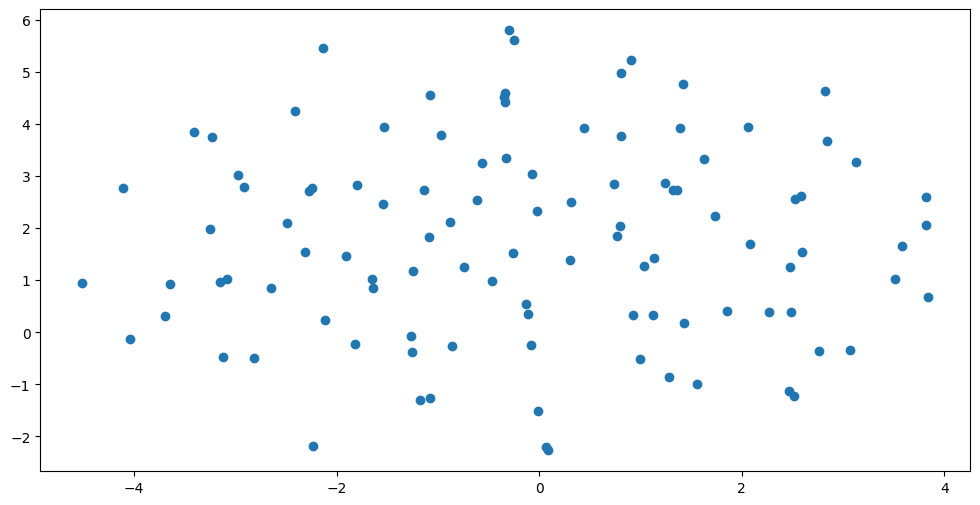

In [52]:
plt.figure(figsize=(12,6))
plt.scatter(x_new_embeddings[:, 0], x_new_embeddings[:, 1], marker='o')

In [53]:
vocab

['ai',
 'helps',
 'efficiency',
 'smart',
 'improves',
 'analyze',
 'aidriven',
 'energy',
 'use',
 'monitor',
 'consumption',
 'digitization',
 'document',
 'processing',
 'wildlife',
 'conservation',
 'shaping',
 'endangered',
 'species',
 'handwriting',
 'future',
 'content',
 'creation',
 'journalism',
 'storytelling',
 'job',
 'matching',
 'platforms',
 'recognition',
 'search',
 'aibased',
 'online',
 'legal',
 'research',
 'lawyers',
 'case',
 'laws',
 'efficiently',
 'used',
 'astronomy',
 'vast',
 'amounts',
 'cosmic',
 'data',
 'homes',
 'automation',
 'revolutionizing',
 'way',
 'people',
 'connect',
 'information',
 'help',
 'candidates',
 'distribution',
 'suitable',
 'analysis',
 'helping',
 'researchers',
 'discover',
 'new',
 'materials',
 'chemical',
 'compounds',
 'law',
 'enforcement',
 'aids',
 'criminal',
 'investigations',
 'predictive',
 'policing',
 'autonomous',
 'ships',
 'transforming',
 'maritime',
 'transportation',
 'aipowered',
 'grids',
 'enhance',
 'per

In [55]:
for i, words in enumerate(vocab[:len(x_new_embeddings)]):
    print(i, words)

0 ai
1 helps
2 efficiency
3 smart
4 improves
5 analyze
6 aidriven
7 energy
8 use
9 monitor
10 consumption
11 digitization
12 document
13 processing
14 wildlife
15 conservation
16 shaping
17 endangered
18 species
19 handwriting
20 future
21 content
22 creation
23 journalism
24 storytelling
25 job
26 matching
27 platforms
28 recognition
29 search
30 aibased
31 online
32 legal
33 research
34 lawyers
35 case
36 laws
37 efficiently
38 used
39 astronomy
40 vast
41 amounts
42 cosmic
43 data
44 homes
45 automation
46 revolutionizing
47 way
48 people
49 connect
50 information
51 help
52 candidates
53 distribution
54 suitable
55 analysis
56 helping
57 researchers
58 discover
59 new
60 materials
61 chemical
62 compounds
63 law
64 enforcement
65 aids
66 criminal
67 investigations
68 predictive
69 policing
70 autonomous
71 ships
72 transforming
73 maritime
74 transportation
75 aipowered
76 grids
77 enhance
78 performance
79 team
80 analytics
81 manufacturing
82 employers
83 financial
84 sector
85 u

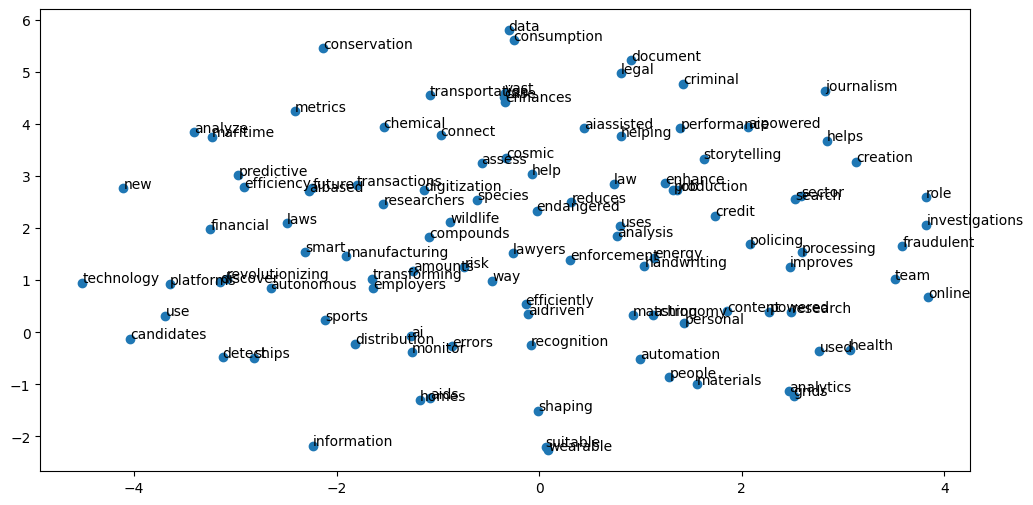

In [61]:
plt.figure(figsize=(12,6))
plt.scatter(x_new_embeddings[:, 0], x_new_embeddings[:, 1], marker='o')
for i, words in enumerate(vocab[:len(x_new_embeddings)]):
    plt.annotate(words, xy=(x_new_embeddings[i,0], x_new_embeddings[i,1]))

In [69]:
word2vec_cbow.wv.most_similar("reduces", topn=5)

[('endangered', 0.21328260004520416),
 ('production', 0.18262866139411926),
 ('help', 0.16839760541915894),
 ('sector', 0.16805176436901093),
 ('law', 0.15568555891513824)]

In [70]:
text = "Barack Obama was the 44th President of the United States."

In [71]:
word_tokenize(text)

['Barack',
 'Obama',
 'was',
 'the',
 '44th',
 'President',
 'of',
 'the',
 'United',
 'States',
 '.']